## Load the data

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import OneHotEncoder

import utils.visualization_tool as visual_tool
import utils.encoding_tool as encoding_tool
%matplotlib inline

# Set styling
plt.style.use('ggplot')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [18]:
# Load the data
df_train = pd.read_csv('census_income_learn.csv', delimiter=';')
df_test = pd.read_csv('census_income_test.csv',delimiter=';')

print('training data size: ', df_train.shape, ' . test dataset size: ',df_test.shape)
print("\nFirst few rows:")
display(df_train.head())

# Column information
print("\nColumn datatypes:")
display(df_train.dtypes)

# Summary statistics for numerical columns
print("\nSummary statistics:")
display(df_train.describe())

training data size:  (199523, 42)  . test dataset size:  (99762, 42)

First few rows:


,age,class_of_worker,industry_recode,occupation_recode,education,Wage_per_hour_?,enrolled_in_edu,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_prev,state_of_prev,detailed_household_and_family_stat,detailed_household_summary_in_household,Instance_weight,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,Family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran_admin,veterans_benefits,weeks_worked_in_year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.



Column datatypes:


age                                           int64
class_of_worker                              object
industry_recode                               int64
occupation_recode                             int64
education                                    object
Wage_per_hour_?                               int64
enrolled_in_edu                              object
marital_stat                                 object
major_industry_code                          object
major_occupation_code                        object
race                                         object
hispanic_origin                              object
sex                                          object
member_of_a_labor_union                      object
reason_for_unemployment                      object
full_or_part_time_stat                       object
capital_gains                                 int64
capital_losses                                int64
dividends_from_stocks                         int64
tax_filer_st


Summary statistics:


,age,industry_recode,occupation_recode,Wage_per_hour_?,capital_gains,capital_losses,dividends_from_stocks,Instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


### EDA: 
- Missing value --> No missing value other than '?' and 'Not in the universe'
- Distribution & outlier --> No obvious outlier, some of the distribution is a bit skewed, and a certain standardization approach needed
- Feature engineering opportunities -->  GEO encoding(i.e country / location), Embedding for text(i.e occupation, education), splitting certain feature into multiple features. (i.e detailed_household_and_family_stat)

In [20]:
object_feat = ['industry_recode', 'occupation_recode', 'own_business_or_self_employed', 'veterans_benefits']

# Convert the specified columns f–to object datatype
df_train[object_feat] = df_train[object_feat].astype('object')
df_test[object_feat] = df_test[object_feat].astype('object')

### Whether there is any missing value or not
print('Check if there is empty value')
df_train.isna().sum()

Check if there is empty value


age                                         0
class_of_worker                             0
industry_recode                             0
occupation_recode                           0
education                                   0
Wage_per_hour_?                             0
enrolled_in_edu                             0
marital_stat                                0
major_industry_code                         0
major_occupation_code                       0
race                                        0
hispanic_origin                             0
sex                                         0
member_of_a_labor_union                     0
reason_for_unemployment                     0
full_or_part_time_stat                      0
capital_gains                               0
capital_losses                              0
dividends_from_stocks                       0
tax_filer_stat                              0
region_of_prev                              0
state_of_prev                     

#### Numeric feature
1. How many missing values in each feature
2. What's the distribution 

Distribution of numerical features


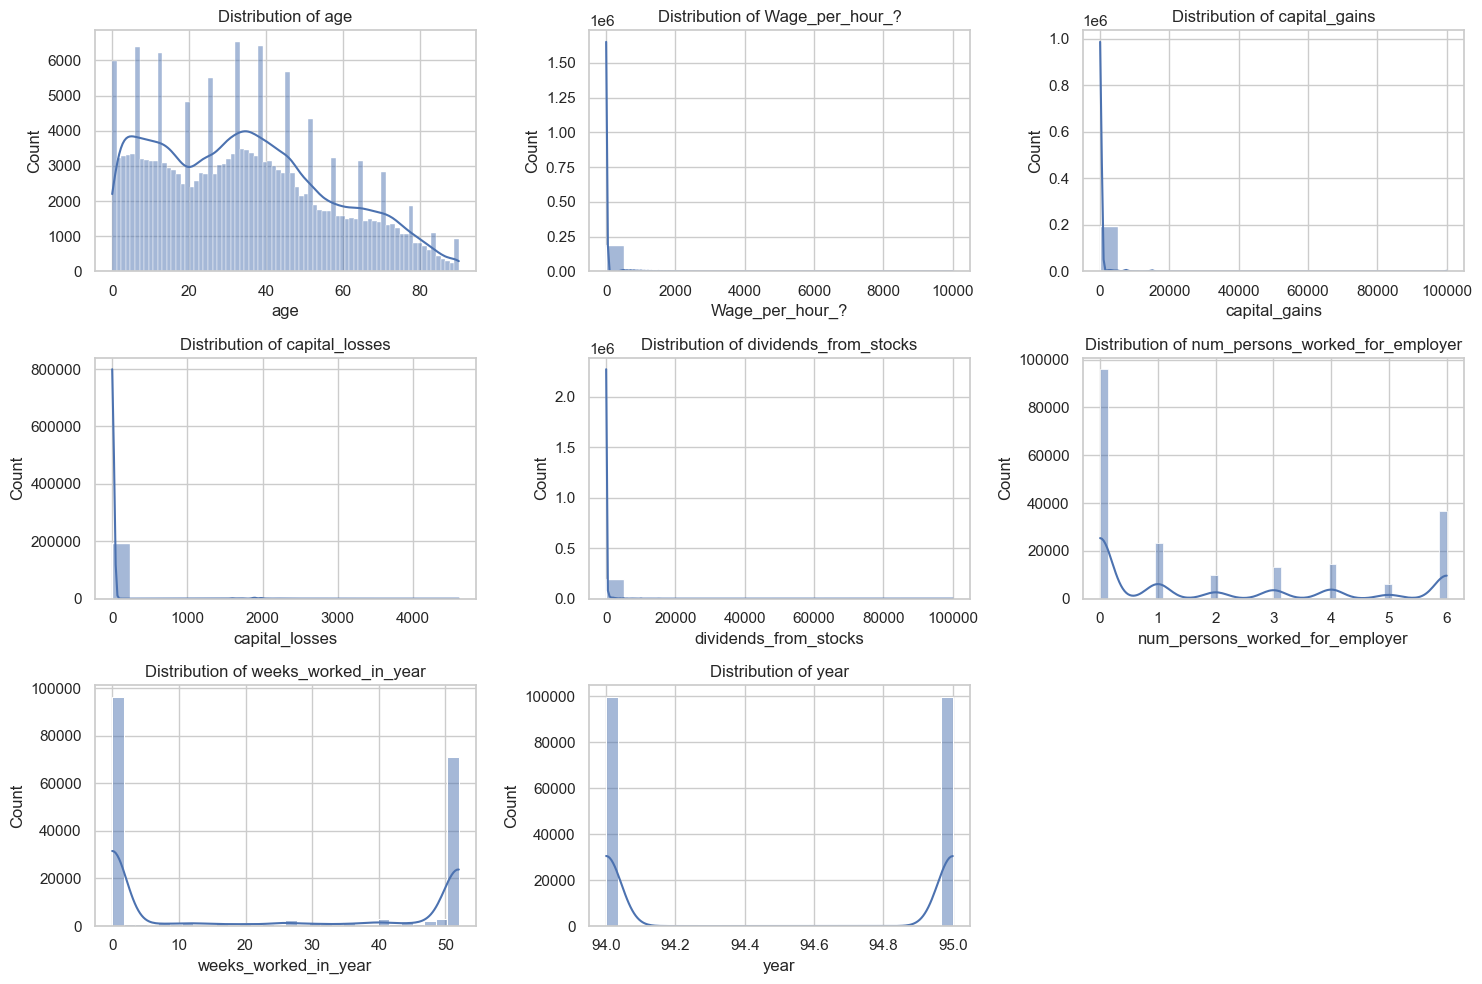

In [22]:
# Identify numeric columns (excluding instance weight)
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if 'weight' not in col.lower()]

print( "Distribution of numerical features") 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_train[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    if i >= 9:
        break  # Limit to 9 plots per figure
plt.tight_layout() 
plt.show() 

The plot for below features are dominated by 0s: Wage per hour, capital gains,capital losses,dividends from stocks 
Create another plot by removing 0s

Distribution of numerical features (excluding zeros)


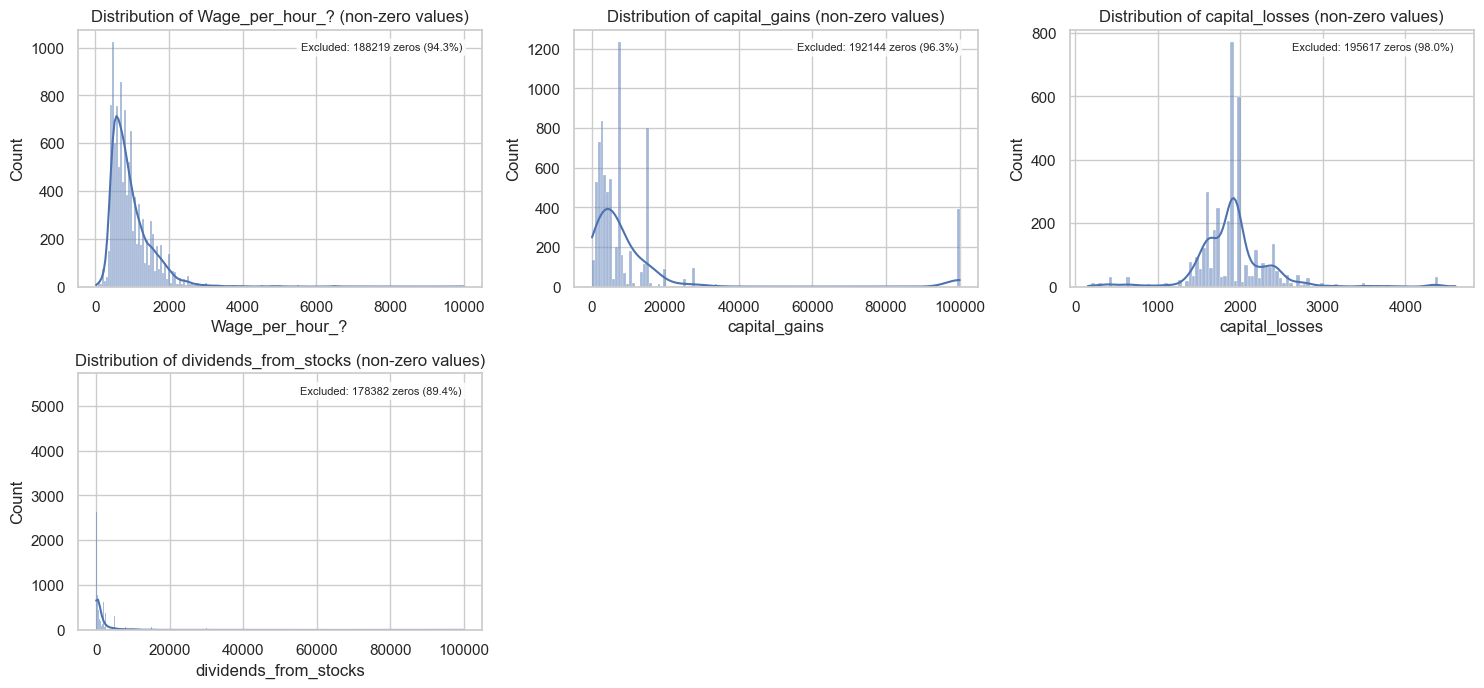

In [23]:
print("The plot for below features are dominated by 0s: Wage per hour, capital gains,capital losses,dividends from stocks \nCreate another plot by removing 0s\n" )

numeric_cols = ['Wage_per_hour_?', 'capital_gains','capital_losses','dividends_from_stocks']

print("Distribution of numerical features (excluding zeros)")
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    
    # Filter out zeros from the data
    nonzero_data = df_train[df_train[col] > 0][col]
    
    # Check if we have any non-zero data
    if len(nonzero_data) > 0:
        # Create histogram with KDE for non-zero values
        sns.histplot(nonzero_data, kde=True)
        
        # Add note about excluded zeros
        zero_count = (df_train[col] == 0).sum()
        zero_percent = (zero_count / len(df_train)) * 100
        plt.annotate(f"Excluded: {zero_count} zeros ({zero_percent:.1f}%)", 
                    xy=(0.95, 0.95), xycoords='axes fraction',
                    ha='right', va='top', fontsize=8,
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))
    else:
        plt.text(0.5, 0.5, "No non-zero values found", 
                ha='center', va='center', transform=plt.gca().transAxes)
    
    plt.title(f'Distribution of {col} (non-zero values)')

plt.tight_layout()
plt.show()

In [27]:
print('The average and median wage per hour after remove 0:')
print('Avg:', df_train[df_train['Wage_per_hour_?']>0]['Wage_per_hour_?'].mean(),' Median:',df_train[df_train['Wage_per_hour_?']>0]['Wage_per_hour_?'].median())
print('The wage per hour feature might not be true') 

The average and median wage per hour after remove 0:
Avg: 978.3212137296532  Median: 800.0
The wage per hour feature might not be true


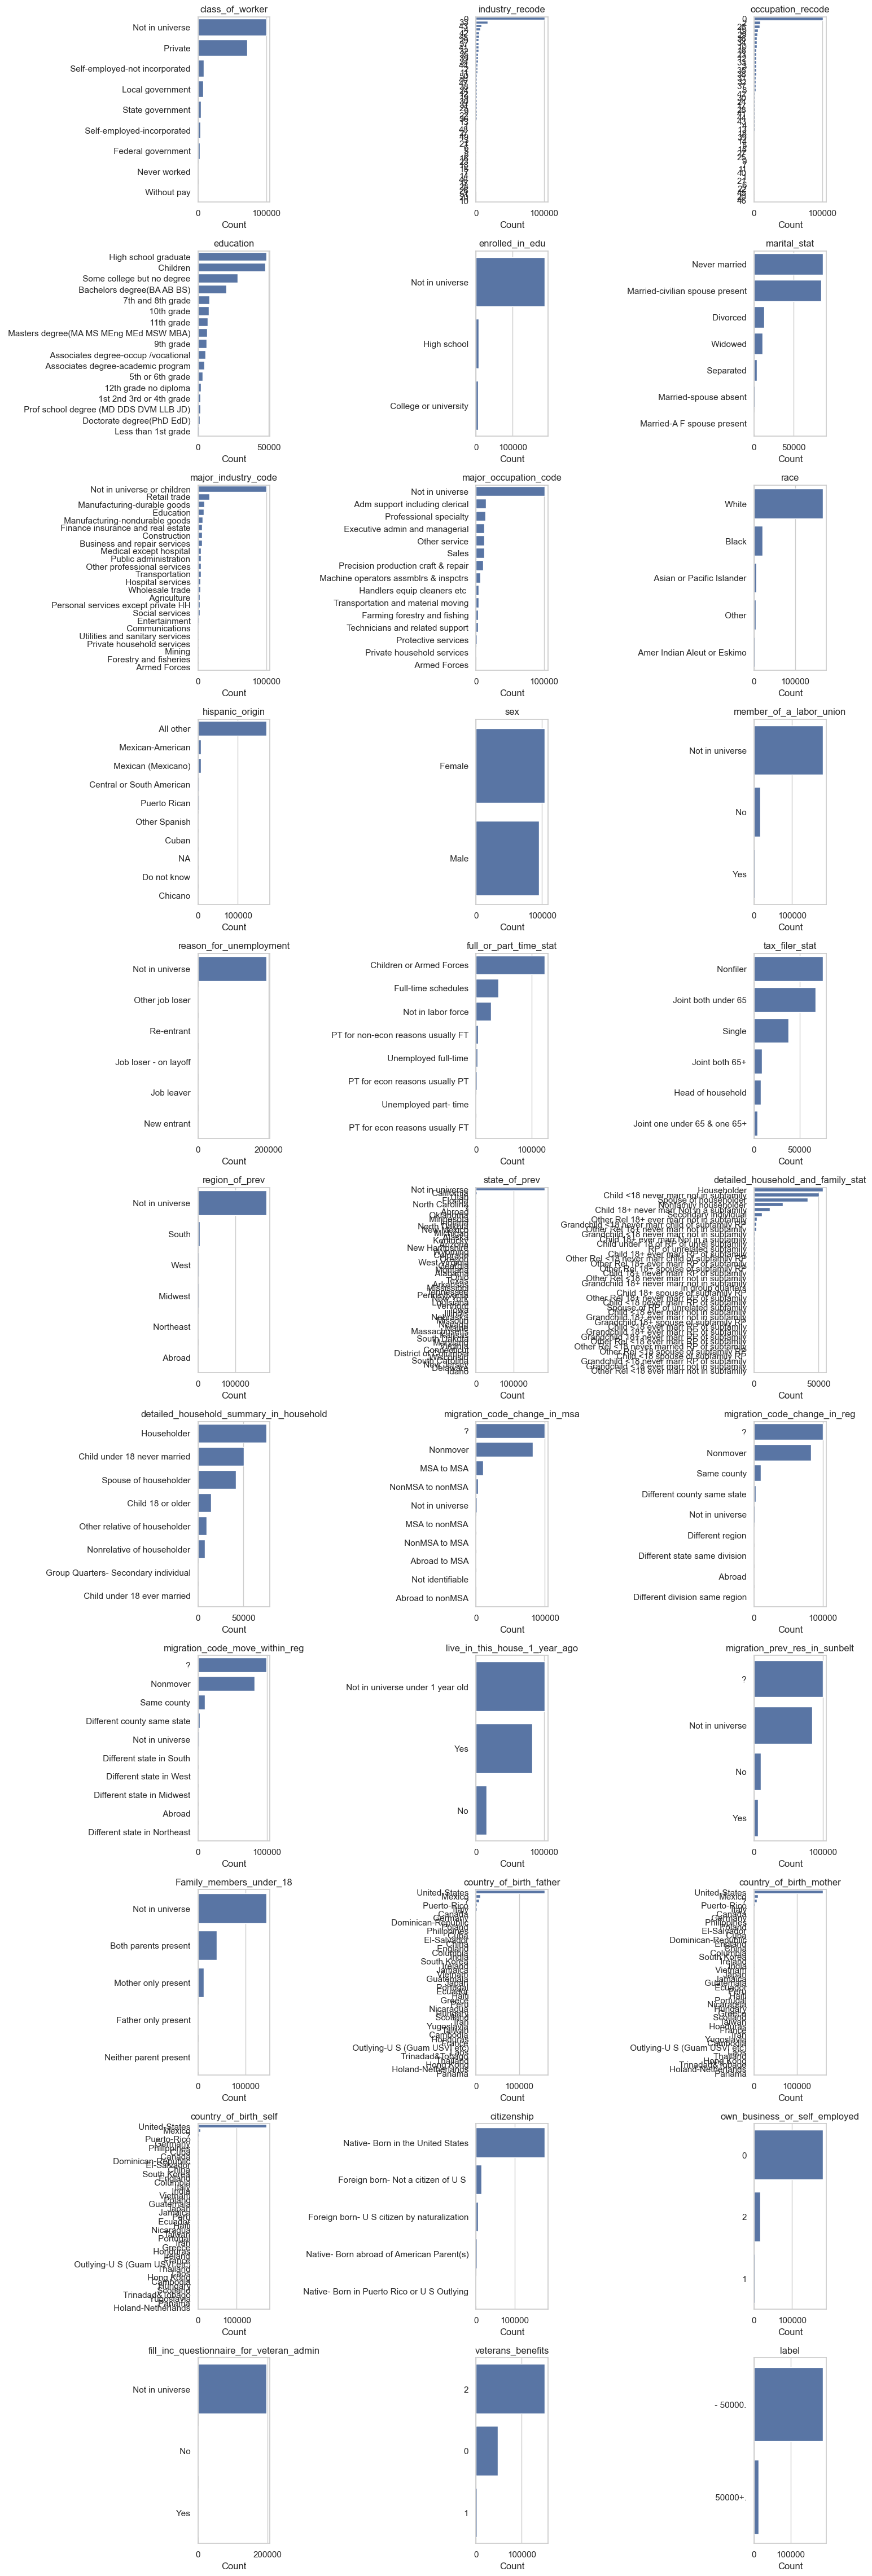

In [30]:
# Identify categorical columns (object dtype)
visual_tool.plot_categorical_columns(df_train)

### Data cleansing 

- No outlier observed
- Based on the potential logic (To be verified by the business)

### Data preparation: 
- Feature engineering: Extract more household information 
- One-hot encoding
- Customized ordinal encoding
- Standardization

#### Feature engineering 
Only implement one for household due to time constraint, there are other potentials to be added

In [36]:
df_train = encoding_tool.engineer_household_features(df_train)
df_test = encoding_tool.engineer_household_features(df_test) 

#### One-hot encoding

In [39]:
one_hot_enc_feat = [
    'class_of_worker', 'industry_recode', 'occupation_recode', 'marital_stat', 
    'major_industry_code', 'major_occupation_code', 'hispanic_origin', 'race', 
    'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 
    'full_or_part_time_stat', 'tax_filer_stat', 'region_of_prev', 
    'state_of_prev', 'detailed_household_and_family_stat', 
    'detailed_household_summary_in_household', 'migration_code_change_in_msa', 'migration_code_change_in_reg',
    'migration_code_move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 
    'Family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 
    'country_of_birth_self', 'citizenship', 'own_business_or_self_employed',
    'fill_inc_questionnaire_for_veteran_admin', 'veterans_benefits', 'year'
]

df_train, df_test = encoding_tool.one_hot_encode_features(df_train, df_test, one_hot_enc_feat) 

#### Customized ordinal encoding for education & enrolled_in_edu

In [41]:

education_hierarchy = [
    "Less than 1st grade", "1st 2nd 3rd or 4th grade", "5th or 6th grade", "7th and 8th grade",
    "9th grade", "10th grade", "11th grade", "12th grade no diploma", "High school graduate",
    "Some college but no degree", "Associates degree-academic program", "Associates degree-occup /vocational",
    "Bachelors degree(BA AB BS)", "Masters degree(MA MS MEng MEd MSW MBA)", 
    "Prof school degree (MD DDS DVM LLB JD)", "Doctorate degree(PhD EdD)"
]
enrolled_hierarchy = [
    "Not enrolled", "High school", "College or university"
]

df_train, df_test = encoding_tool.encode_ordinal_feature(df_train, df_test, 'education', education_hierarchy, encoding_tool)
df_train, df_test = encoding_tool.encode_ordinal_feature(df_train, df_test, 'enrolled_in_edu', enrolled_hierarchy, encoding_tool)


#### Standardize the numeric feature

In [46]:
from sklearn.preprocessing import StandardScaler

print("Drop instance weight")
df_train = df_train.drop('Instance_weight', axis=1)
df_test = df_test.drop('Instance_weight', axis=1)

print("Standardization the continuous value")
log_norm_feat = ['Wage_per_hour_?', 'capital_gains','capital_losses','dividends_from_stocks']
for col in log_norm_feat:
    df_train[col] = np.log1p(df_train[col])  # log1p = log(x + 1), avoids issues with zeros
    df_test[col] = np.log1p(df_test[col]) 


scaler = StandardScaler()
scaler.fit(df_train[['age']])

df_train['age'] = scaler.transform(df_train[['age']]) 
df_test['age'] = scaler.transform(df_test[['age']])

scaler = StandardScaler() 
scaler.fit(df_train[['weeks_worked_in_year']])
df_train['weeks_worked_in_year'] = scaler.transform(df_train[['weeks_worked_in_year']]) 
df_test['weeks_worked_in_year'] = scaler.transform(df_test[['weeks_worked_in_year']]) 

Drop instance weight
Standardization the continuous value


### Feature reduction
Some feature correlation / feature reduction analysis can be added in here for logsitc regression model 

In [24]:
"""
To-do:
- Remove the conflict the records 
"""

### Create train & validation dataset

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split

label_map = {' - 50000.':0,' 50000+.':1 } 

X_train = df_train.drop('label', axis=1)  # Features
y_train = df_train['label'].map(label_map) 

X_test = df_test.drop('label',axis=1) 
y_test = df_test['label'].map(label_map) 

### Hyper-parameter tuning

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, roc_curve
import xgboost as xgb 
from imblearn.under_sampling import RandomUnderSampler 
import warnings 
import model as modeling 
warnings.filterwarnings('ignore') 

print("Applying random oversampling")   # --> Reduce training time, only to demonstrate the process 
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersample, y_train_undersample = undersampler.fit_resample(X_train, y_train) 

print('The data shape after under-sampled:') 
print(X_train_undersample.shape, y_train_undersample.value_counts()) 


Applying random oversampling
The data shape after under-sampled:
(24764, 522) label
0    12382
1    12382
Name: count, dtype: int64


In [55]:
# Resolve some feature naming issue 
X_train_undersample.columns = [col.replace("[", "").replace("]", "").replace("<", "") for col in X_train_undersample.columns]
X_train.columns = [col.replace("[", "").replace("]", "").replace("<", "") for col in X_train.columns]
X_test.columns = [col.replace("[", "").replace("]", "").replace("<", "") for col in X_test.columns]

In [59]:
print("Grid search to identify the best hyperparameter:")
lr_model = modeling.logistic_regression_model(X_train_undersample, y_train_undersample)
xgb_model = modeling.xgboost_model(X_train_undersample, y_train_undersample)

Grid search to identify the best hyperparameter:
Training Logistic Regression model...
Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Training XGBoost model...
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1}


## Train the model on the full dataset & evaluating the model
Four different models: 
- Logistic regression + oversampling
- Logistic regression without oversampling
- Xgboost with oversampling
- Xgboost without oversampling

In [100]:
df_res = pd.DataFrame({'label': y_test})  # Store all the probability

In [60]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

y_resampled.value_counts() 

label
0    187141
1    187141
Name: count, dtype: int64

Logistic Regression with over-sampling results:
Logistic Regression Accuracy: 0.8462


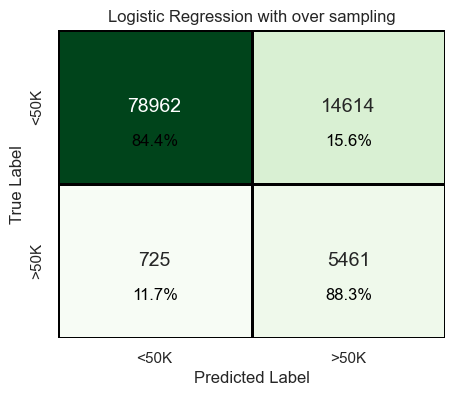

Logistic Regression with over sampling Classification Report:

              precision    recall  f1-score   support

        <50K       0.99      0.84      0.91     93576
        >50K       0.27      0.88      0.42      6186

    accuracy                           0.85     99762
   macro avg       0.63      0.86      0.66     99762
weighted avg       0.95      0.85      0.88     99762



In [139]:
# Logistic regression model with over-sampling
from sklearn.metrics import accuracy_score,confusion_matrix

log_reg = LogisticRegression(C=1, penalty='l1', solver='liblinear')
log_reg.fit(X_resampled, y_resampled)
y_pred = log_reg.predict(X_test)

y_pred_prob = y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1:]
df_res['lr_sampling_prob'] = y_pred_prob

log_reg_acc = accuracy_score(y_test, y_pred)
print('Logistic Regression with over-sampling results:')
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}") 
visual_tool.plot_custom_confusion_matrix(y_test, y_pred, "Logistic Regression with over sampling") 

Logistic Regression without over-sampling results:
Logistic Regression Accuracy: 0.9504


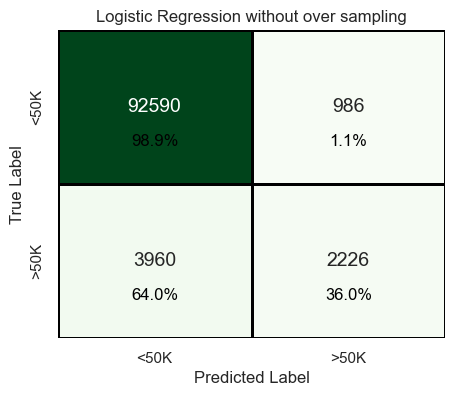

Logistic Regression without over sampling Classification Report:

              precision    recall  f1-score   support

        <50K       0.96      0.99      0.97     93576
        >50K       0.69      0.36      0.47      6186

    accuracy                           0.95     99762
   macro avg       0.83      0.67      0.72     99762
weighted avg       0.94      0.95      0.94     99762



In [140]:
# Train a logistic regression model without over-sampling 
from sklearn.metrics import accuracy_score,confusion_matrix

log_reg = LogisticRegression(C=1, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

y_pred_prob = y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1:]
df_res['lr_no_sampling_prob'] = y_pred_prob 

print('Logistic Regression without over-sampling results:')
log_reg_acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}") 
visual_tool.plot_custom_confusion_matrix(y_test, y_pred, "Logistic Regression without over sampling") 


XGBboost with over-sampling results:
XGBoost Accuracy: 0.9086


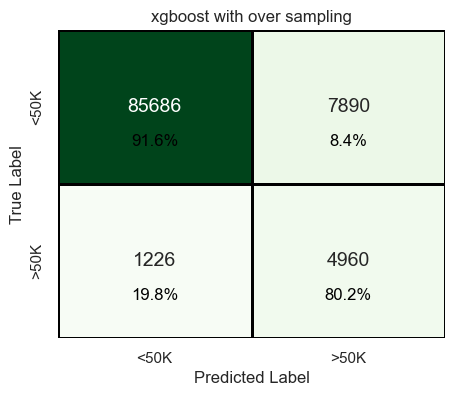

xgboost with over sampling Classification Report:

              precision    recall  f1-score   support

        <50K       0.99      0.92      0.95     93576
        >50K       0.39      0.80      0.52      6186

    accuracy                           0.91     99762
   macro avg       0.69      0.86      0.74     99762
weighted avg       0.95      0.91      0.92     99762



In [182]:
# from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_resampled, y_resampled)

# Predictions 
y_pred_xgb = xgb.predict(X_test) 

y_pred_prob = xgb.predict_proba(X_test) 
y_pred_prob = y_pred_prob[:,1:] 
df_res['xgb_sampling_prob'] = y_pred_prob 

print('XGBboost with over-sampling results:')
# Accuracy
xgb_acc = accuracy_score(y_test, y_pred_xgb) 
print(f"XGBoost Accuracy: {xgb_acc:.4f}") 
visual_tool.plot_custom_confusion_matrix(y_test, y_pred_xgb, "xgboost with over sampling") 

XGBboost without over-sampling results:
XGBoost Accuracy: 0.9572


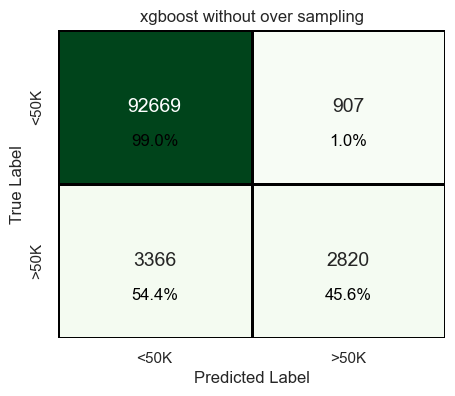

xgboost without over sampling Classification Report:

              precision    recall  f1-score   support

        <50K       0.96      0.99      0.98     93576
        >50K       0.76      0.46      0.57      6186

    accuracy                           0.96     99762
   macro avg       0.86      0.72      0.77     99762
weighted avg       0.95      0.96      0.95     99762



In [142]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train) 

# Predictions 
y_pred_xgb = xgb.predict(X_test)

y_pred_prob = xgb.predict_proba(X_test) 
y_pred_prob = y_pred_prob[:,1:]
df_res['xgb_no_sampling_prob'] = y_pred_prob

print('XGBboost without over-sampling results:')
# Accuracyu 
xgb_acc = accuracy_score(y_test, y_pred_xgb) 
print(f"XGBoost Accuracy: {xgb_acc:.4f}") 
visual_tool.plot_custom_confusion_matrix(y_test, y_pred_xgb, "xgboost without over sampling") 

### Post-analysis
- PR AUC curve
- Feature importance

In [ ]:
df_res['xgb_sampling_prob']

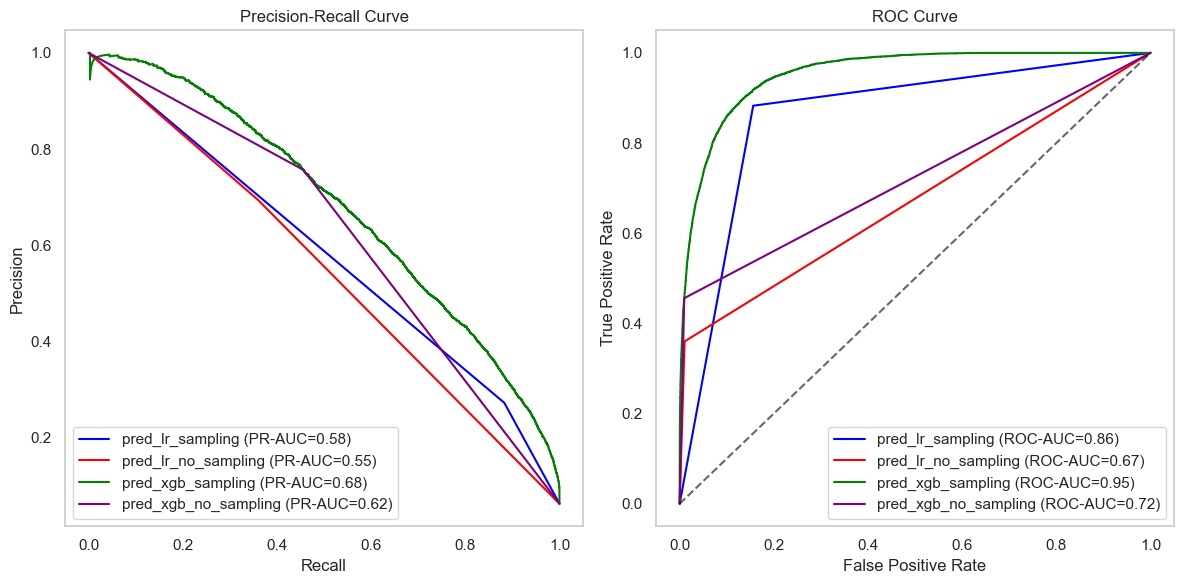

In [156]:
import numpy as np
import pandas as pd

# Models and colors
models = ['lr_sampling', 'lr_no_sampling', 'xgb_sampling', 'xgb_no_sampling']
colors = ['blue', 'red', 'green', 'purple']

visual_tool.plot_pr_roc_curves(df_res,models,colors)


### Feature importance ( Top 20 ) 
- Logistic regression
- Xgboost

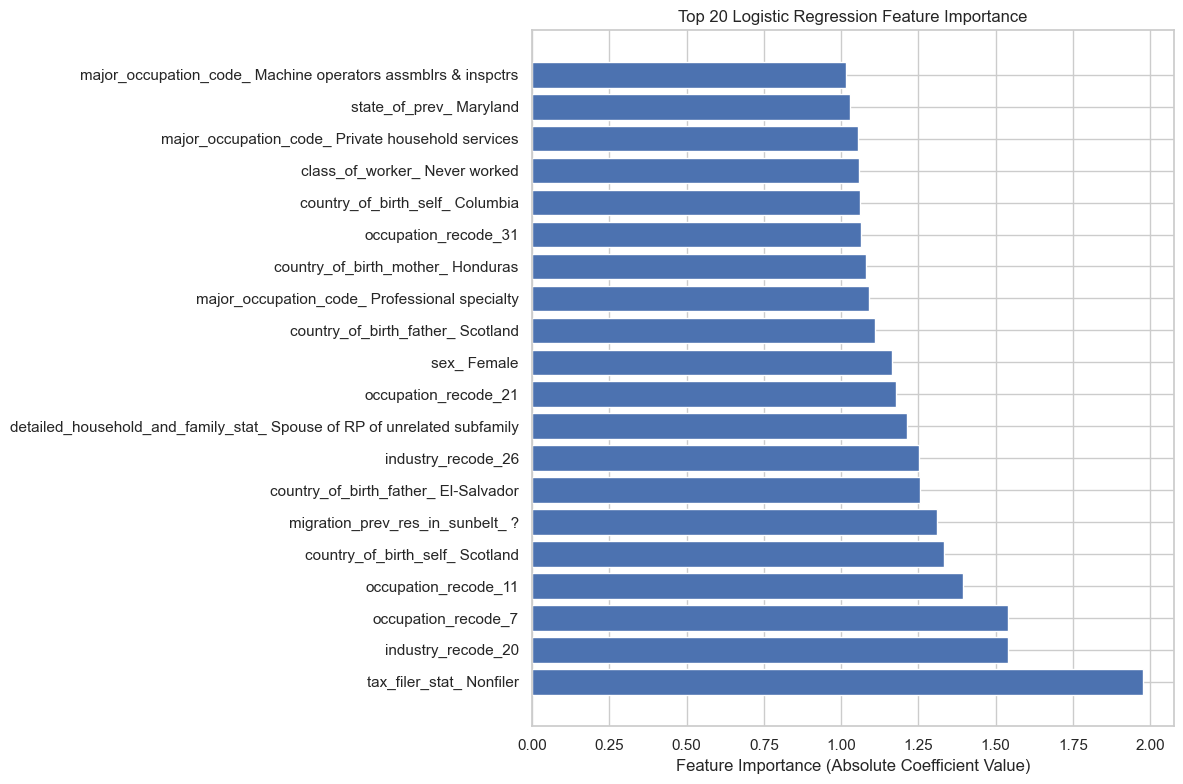

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from logistic regression
coefficients = log_reg.coef_[0]
feature_names = X_train.columns

# Create arrays of feature importance (absolute values) and names
feature_importance = np.abs(coefficients)
feature_names = np.array(feature_names)

# Sort by importance (descending)
indices = np.argsort(feature_importance)[::-1]

# Select top 20
top_indices = indices[:20]
top_importance = feature_importance[top_indices]
top_names = feature_names[top_indices]

# Create plot
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_indices)), top_importance)
plt.yticks(range(len(top_indices)), top_names)
plt.xlabel('Feature Importance (Absolute Coefficient Value)')
plt.title('Top 20 Logistic Regression Feature Importance')
plt.tight_layout()
plt.show()

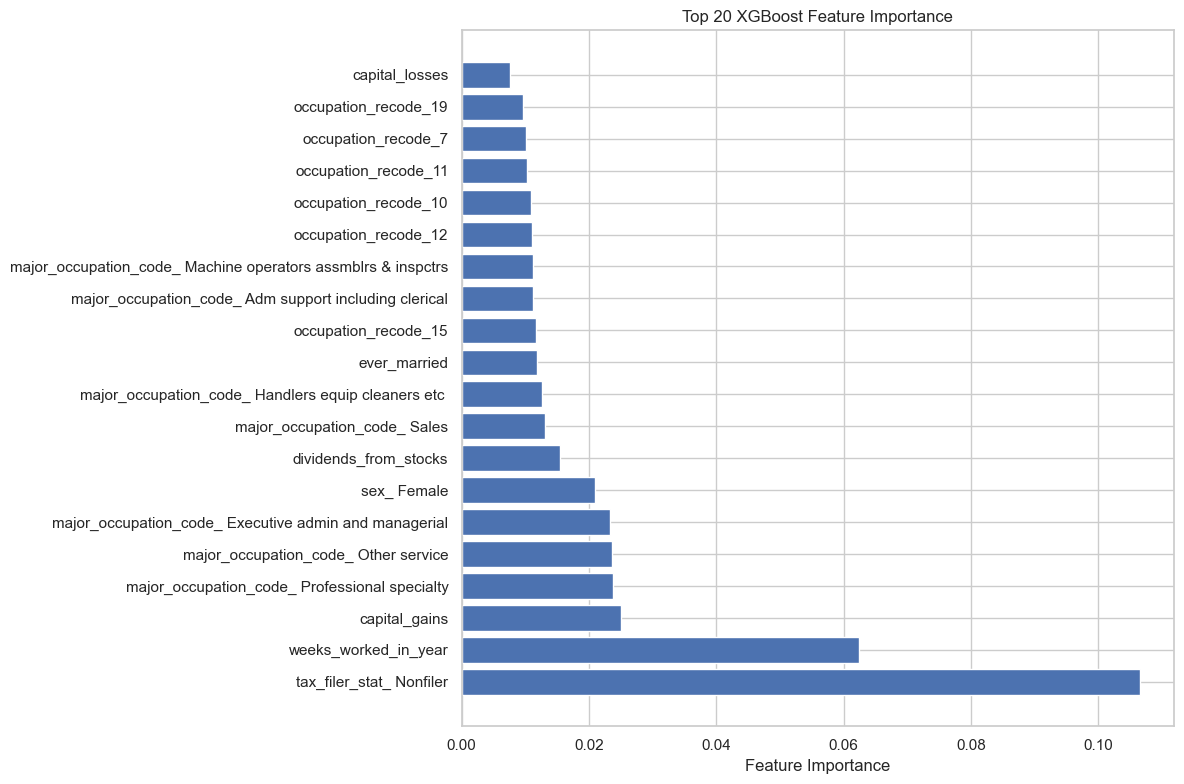

In [69]:
# Plot top 20 features using built-in feature importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importance = xgb.feature_importances_
# Create arrays of feature importance and names
feature_importance = np.array(importance)
feature_names = np.array(X_train.columns)

# Sort by importance (descending)
indices = np.argsort(feature_importance)[::-1]

# Select top 20
top_indices = indices[:20]
top_importance = feature_importance[top_indices]
top_names = feature_names[top_indices]

# Create plot
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_indices)), top_importance)
plt.yticks(range(len(top_indices)), top_names)
plt.xlabel('Feature Importance')
plt.title('Top 20 XGBoost Feature Importance')
plt.tight_layout()
plt.show()